# Загрузка данных

Данные взяты с сайта kaggle
[данные о продажах маркетплейса Amazon](https://www.kaggle.com/datasets/ammaraahmad/us-ecommerce-record-2020)

In [79]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lesson 14/amazon_market_data.csv')

In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
df

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,30-12-20,908,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279
3308,30-12-20,909,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
3309,30-12-20,1297,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188
3310,30-12-20,1298,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750


# Приведение столбцов к стилю camel_case
стиль camelCase (где первая буква первого слова — строчная, а первые буквы последующих слов — прописные, без разделителей)

In [82]:
import re

def to_camel_case(snake_str):
    # Replace hyphens and spaces with a single space to treat them as word separators
    s = snake_str.replace('-', ' ').replace(' ', ' ')
    # Capitalize the first letter of each word and join them without spaces
    s = ''.join(word.capitalize() for word in s.split())
    # Lowercase the first letter of the entire string, unless it's empty
    return s[0].lower() + s[1:] if s else s

df.columns = [to_camel_case(col) for col in df.columns]

In [83]:
df.columns

Index(['orderDate', 'rowId', 'orderId', 'shipMode', 'customerId', 'segment',
       'country', 'city', 'state', 'postalCode', 'region', 'productId',
       'category', 'subCategory', 'productName', 'sales', 'quantity',
       'discount', 'profit'],
      dtype='object')

# Приведение типов данных

Для приведения столбца 'orderDate' к типу datetime, я использую pd.to_datetime, указав формат '%d-%m-%y'.

In [84]:
df['orderDate'] = pd.to_datetime(df['orderDate'], format='%d-%m-%y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   orderDate    3312 non-null   datetime64[ns]
 1   rowId        3312 non-null   int64         
 2   orderId      3312 non-null   object        
 3   shipMode     3312 non-null   object        
 4   customerId   3312 non-null   object        
 5   segment      3312 non-null   object        
 6   country      3312 non-null   object        
 7   city         3312 non-null   object        
 8   state        3312 non-null   object        
 9   postalCode   3312 non-null   int64         
 10  region       3312 non-null   object        
 11  productId    3312 non-null   object        
 12  category     3312 non-null   object        
 13  subCategory  3312 non-null   object        
 14  productName  3312 non-null   object        
 15  sales        3312 non-null   float64       
 16  quanti

# Поиск дублей и пропусков в данных

In [85]:
print(f"Количество дубликатов: {df.duplicated().sum()}")
print("Количество пропущенных значений по столбцам:")
print(df.isnull().sum())

Количество дубликатов: 0
Количество пропущенных значений по столбцам:
orderDate      0
rowId          0
orderId        0
shipMode       0
customerId     0
segment        0
country        0
city           0
state          0
postalCode     0
region         0
productId      0
category       0
subCategory    0
productName    0
sales          0
quantity       0
discount       0
profit         0
dtype: int64


# Исследовательский анализ данных

In [86]:
# сколько уникальных заказов?

In [87]:
unique_orders = df['orderId'].nunique()
print(f"Количество уникальных заказов: {unique_orders}")

Количество уникальных заказов: 1687


In [88]:
# сколько уникальных клиентов?

In [89]:
unique_customers = df['customerId'].nunique()
print(f"Количество уникальных клиентов: {unique_customers}")

Количество уникальных клиентов: 693


локация пользователей = заказы по штатам

                   state  unique_customers
0             California               291
1               New York               158
2                  Texas               153
3               Illinois                96
4           Pennsylvania                94
5             Washington                93
6                   Ohio                82
7                Florida                69
8         North Carolina                47
9              Tennessee                33
10              Michigan                32
11               Arizona                31
12               Georgia                31
13               Indiana                25
14              Colorado                24
15              Virginia                23
16              Kentucky                23
17         Massachusetts                22
18            New Jersey                22
19             Minnesota                19
20              Maryland                19
21           Connecticut                18
22         

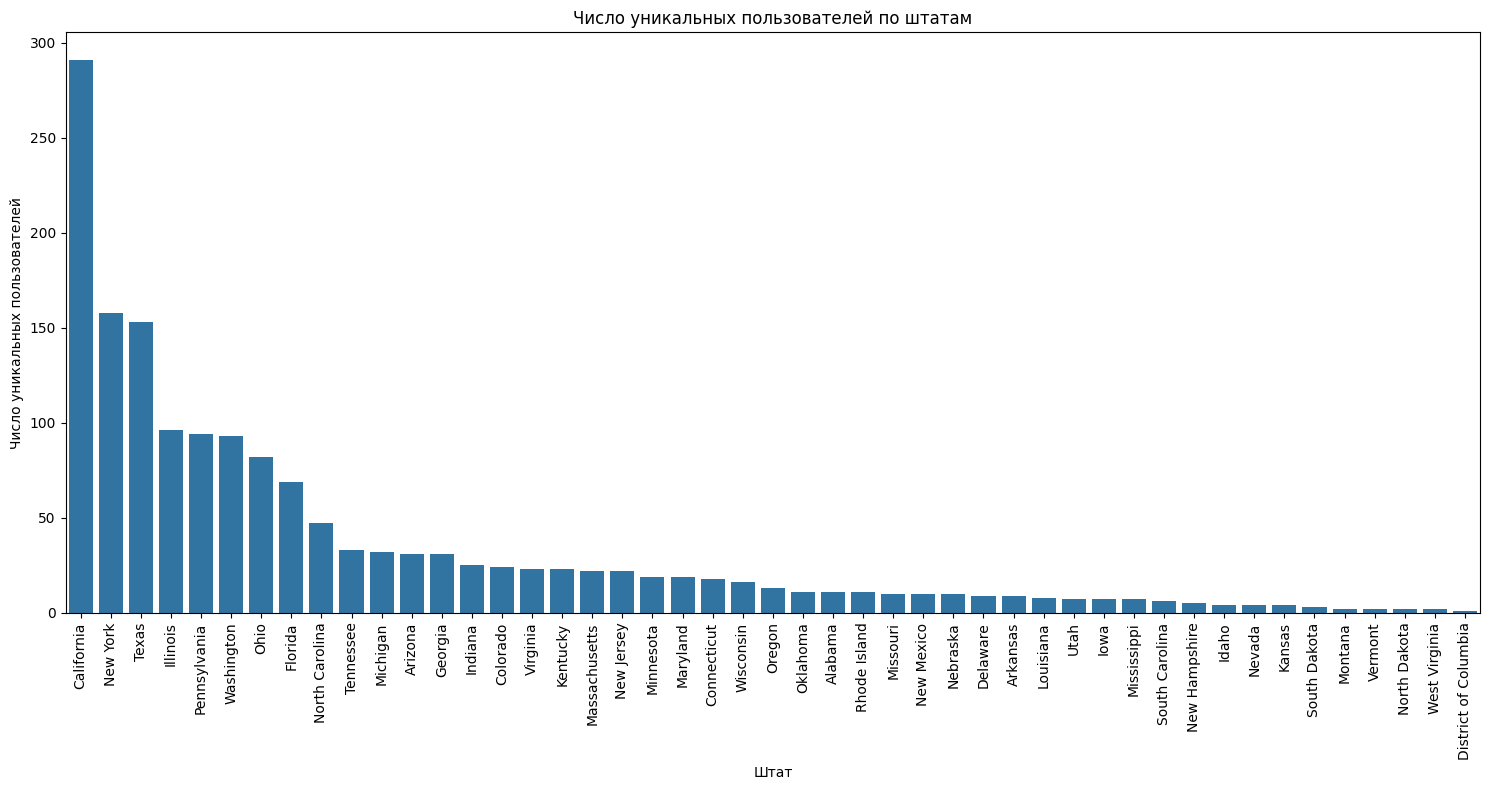

In [90]:
result = df.groupby('state')['customerId'].nunique().sort_values(ascending=False).reset_index()#result = df.groupby('state')['customerId'].nunique().reset_index()
result.columns = ['state', 'unique_customers']
print(result)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.barplot(x='state', y='unique_customers', data=result)
plt.xticks(rotation=90)
plt.title('Число уникальных пользователей по штатам')
plt.xlabel('Штат')
plt.ylabel('Число уникальных пользователей')
plt.tight_layout()
plt.show()

заказы по штатам

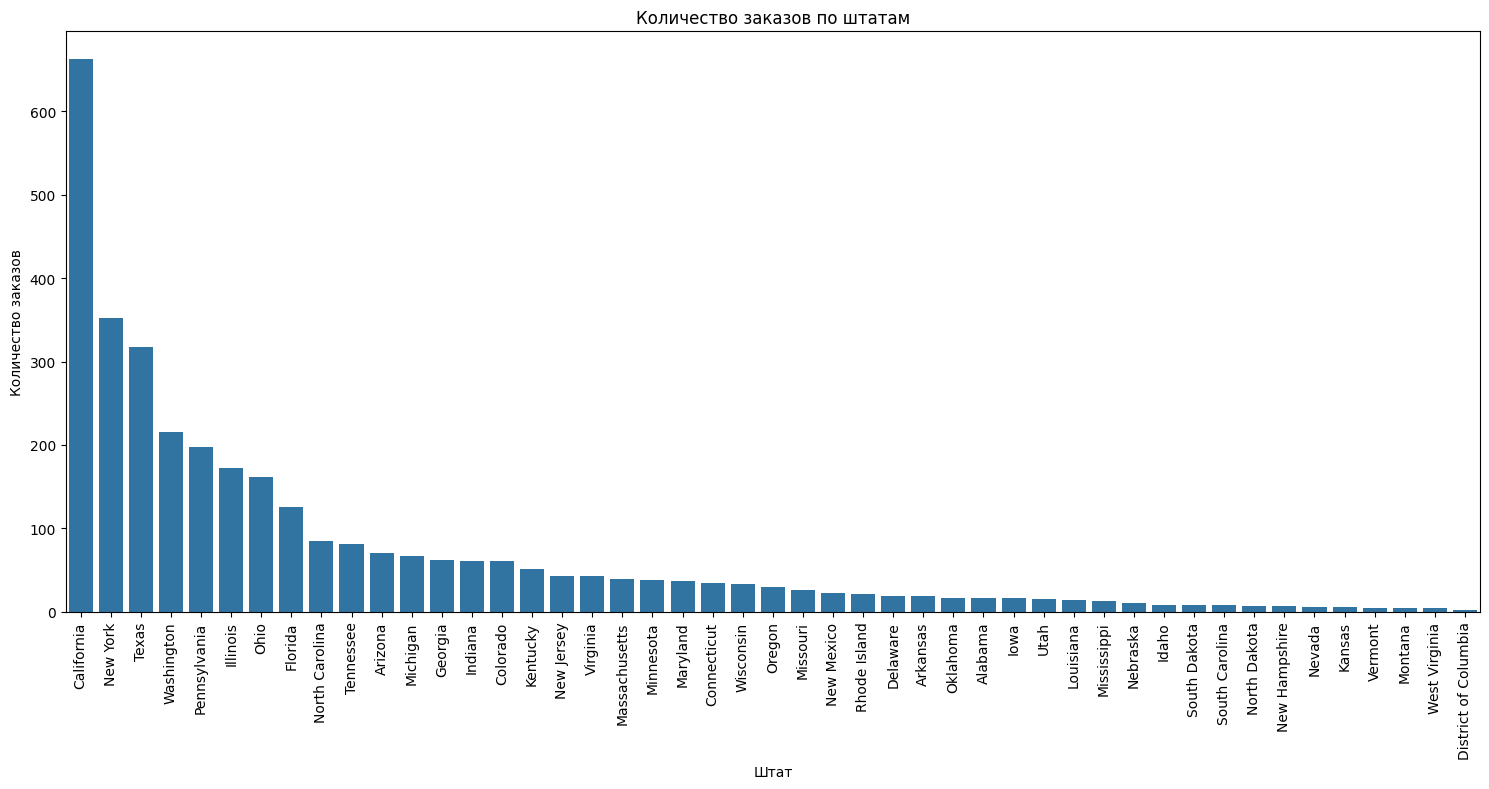

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

orders_by_state = df['state'].value_counts().reset_index()
orders_by_state.columns = ['state', 'order_count']

plt.figure(figsize=(15, 8))
sns.barplot(x='state', y='order_count', data=orders_by_state)
plt.xticks(rotation=90)  # угол наклона:
plt.xticks(fontsize=10)
#plt.subplots_adjust(bottom=0.1, left=0.6)
#ax.tick_params(axis='x', labelrotation=45)
plt.tight_layout()  # чтобы подписи не обрезались
#plt.xticks(rotation=90)
plt.title('Количество заказов по штатам')
plt.xlabel('Штат')
plt.ylabel('Количество заказов')
plt.tight_layout()
plt.show()

 - по заказам лидируют Калифорния, Нью Йорк, Техас.
 - колич. заказов по штатам коррелирует (совпадает, пропорцианально) с числом клиентов в штатах

Распределение сумм продаж по штатам

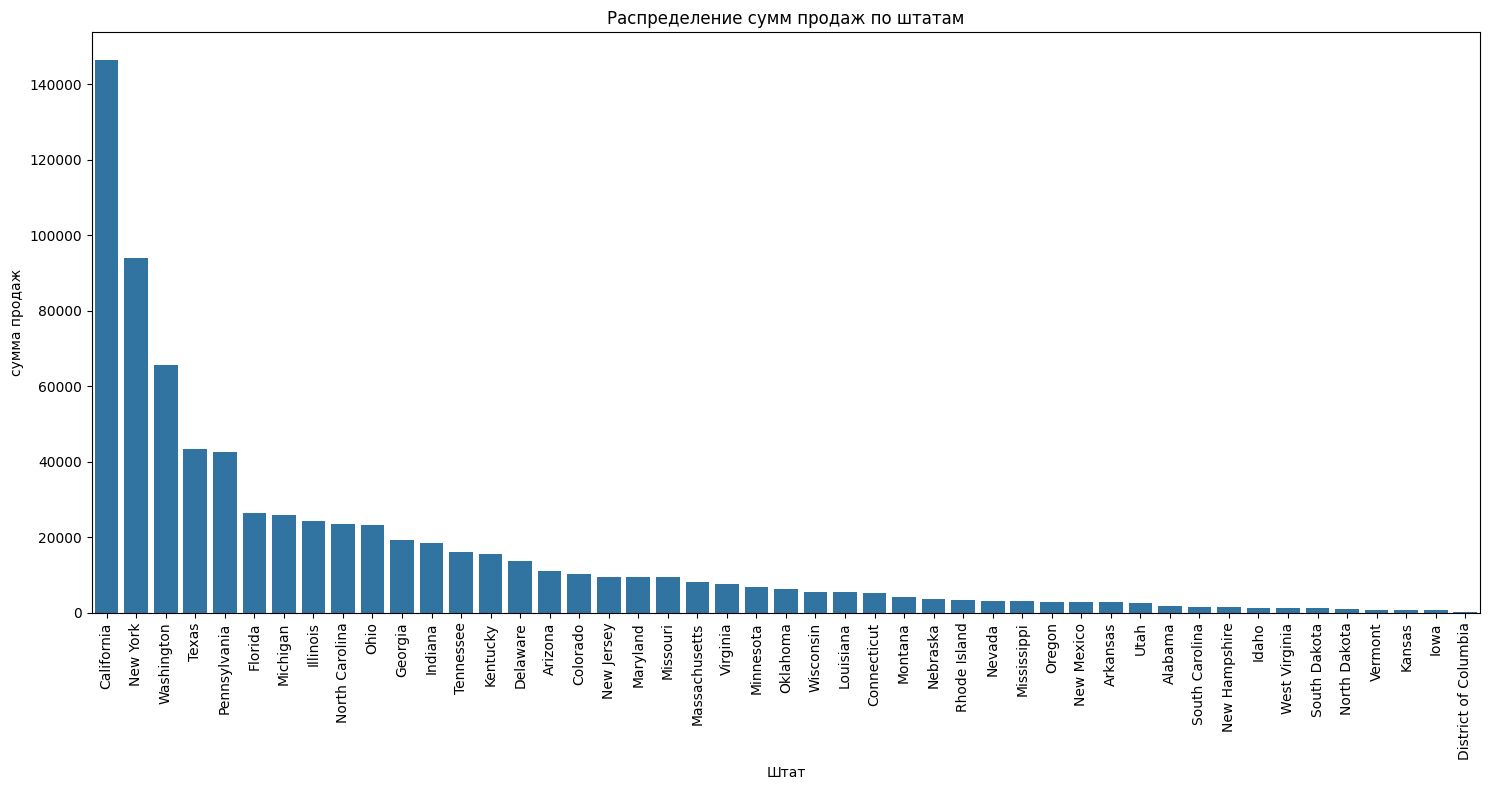

In [92]:
sales_by_state = df.groupby('state')['sales'].sum().reset_index()
sales_by_state = sales_by_state.sort_values(by='sales', ascending=False)

plt.figure(figsize=(15, 8))
sns.barplot(x='state', y='sales', data=sales_by_state)
plt.xticks(rotation=90)
plt.title('Распределение сумм продаж по штатам')
plt.xlabel('Штат')
plt.ylabel('сумма продаж')
plt.tight_layout()
plt.show()

 - по суммам продаж лидируют Калифорния, Нью Йорк, Вашингтон.

динамика кол-ва заказов по дате заказов

динамика кол-ва заказов по месяцам

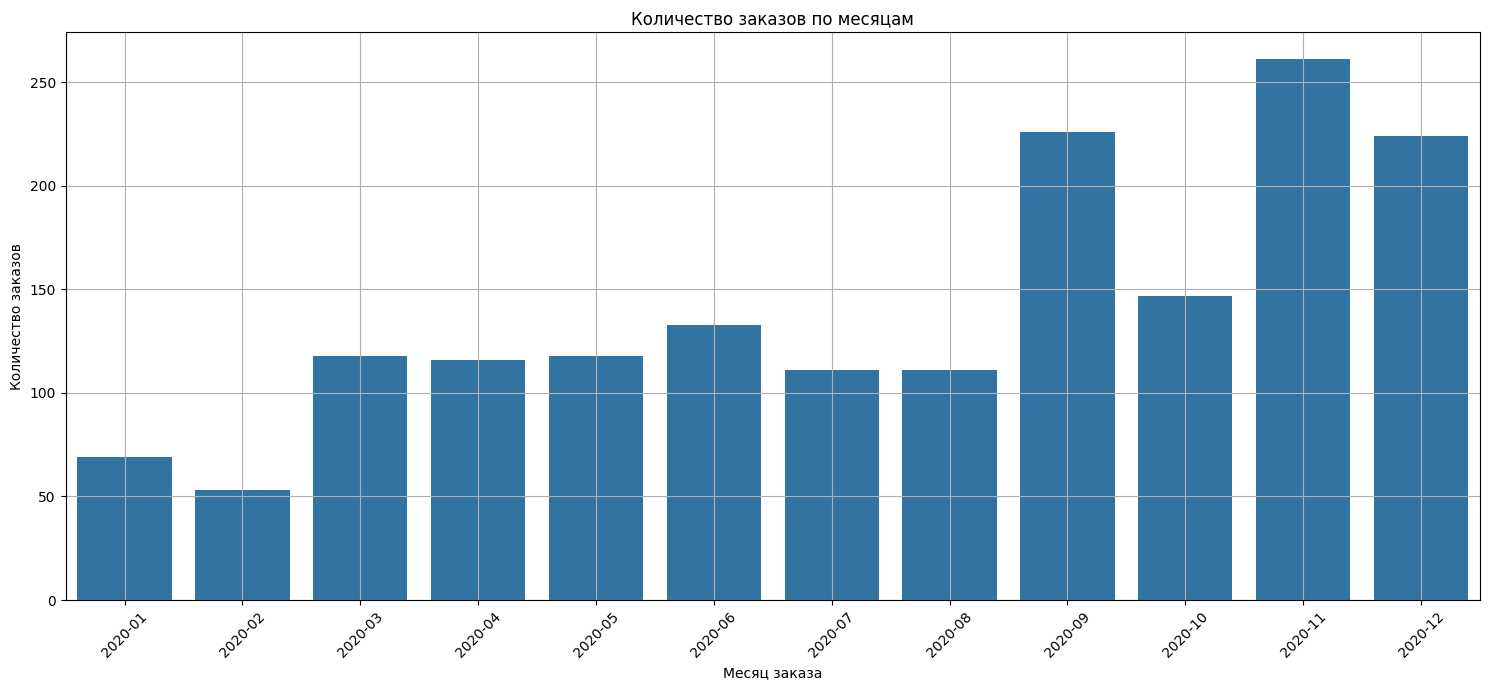

In [93]:
orders_by_month = df.copy()
orders_by_month['orderMonth'] = orders_by_month['orderDate'].dt.to_period('M')
orders_by_month_count = orders_by_month.groupby('orderMonth')['orderId'].nunique().reset_index()
orders_by_month_count.columns = ['orderMonth', 'order_count']

plt.figure(figsize=(15, 7))
sns.barplot(x='orderMonth', y='order_count', data=orders_by_month_count)
plt.title('Количество заказов по месяцам')
plt.xlabel('Месяц заказа')
plt.ylabel('Количество заказов')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

 - динамика количества заказов по месяцам (дате заказа.) показывает рост колич заказов в течение года от 60 (янв, февр) до 220 в конце года.

Динамика продаж по месяцам

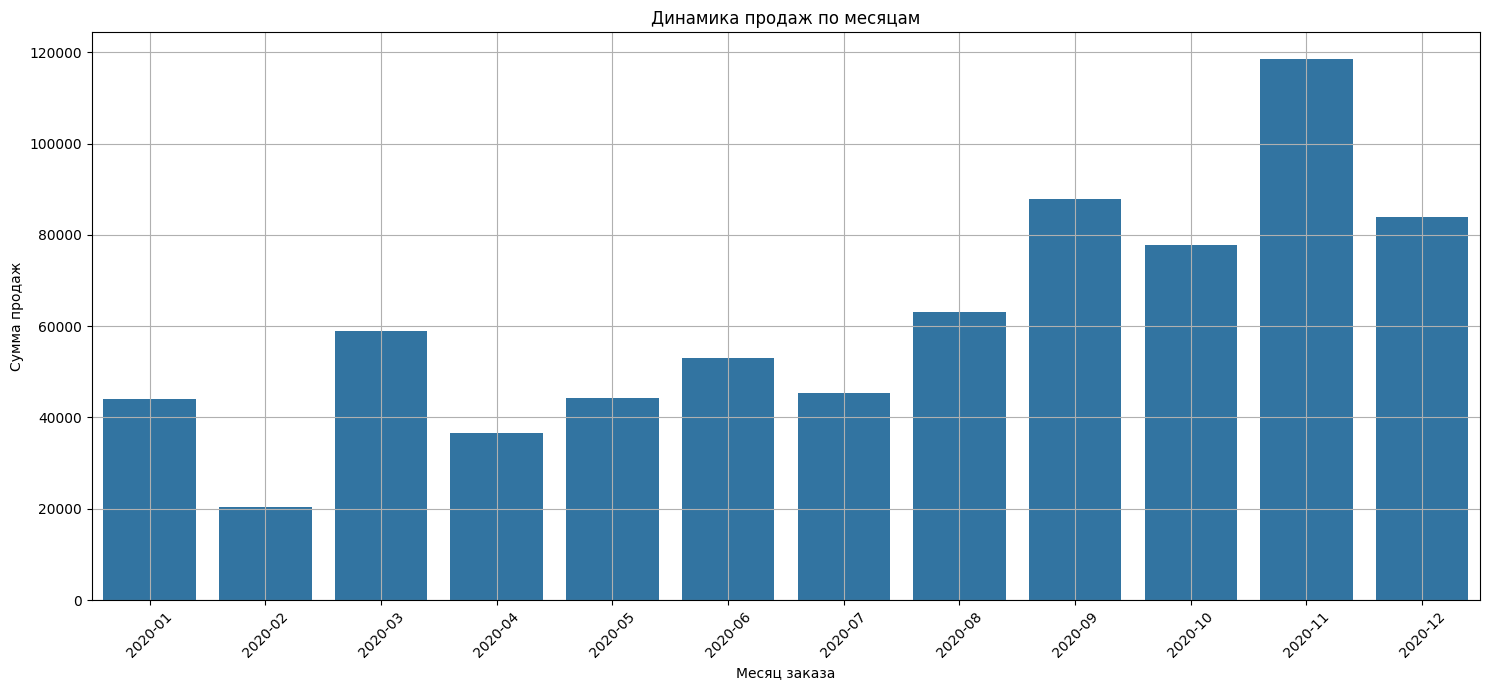

In [94]:
sales_by_month = df.copy()
sales_by_month['orderMonth'] = sales_by_month['orderDate'].dt.to_period('M')
sales_by_month_total = sales_by_month.groupby('orderMonth')['sales'].sum().reset_index()
sales_by_month_total.columns = ['orderMonth', 'total_sales']

plt.figure(figsize=(15, 7))
sns.barplot(x='orderMonth', y='total_sales', data=sales_by_month_total)
plt.title('Динамика продаж по месяцам')
plt.xlabel('Месяц заказа')
plt.ylabel('Сумма продаж')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

- аналогично ведет себя сума продаж: растет от 30000 в начале года до 90000 в конце.

 распределение продаж по категориям заказов

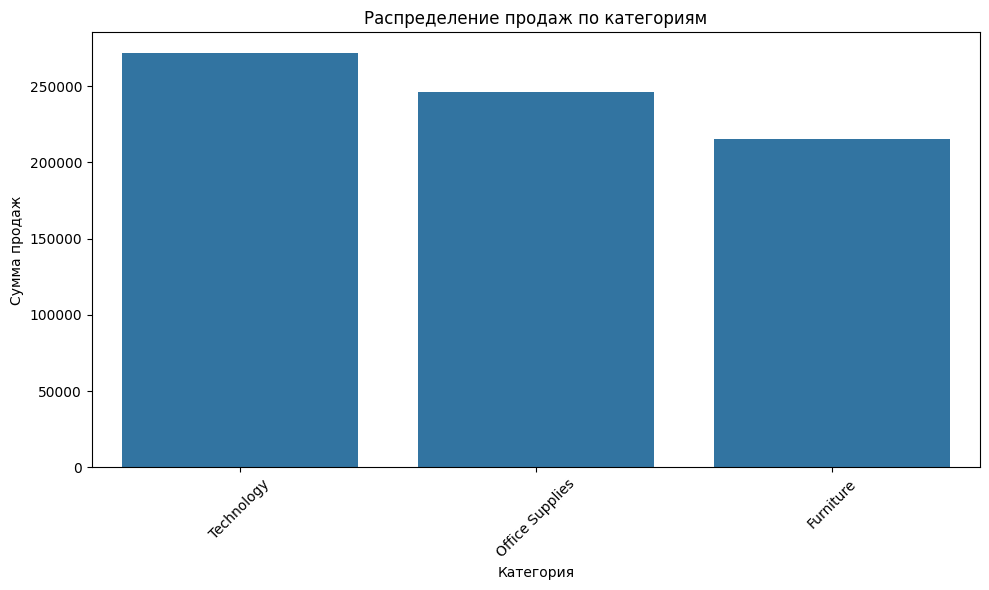

In [95]:
sales_by_category = df.groupby('category')['sales'].sum().reset_index()
sales_by_category = sales_by_category.sort_values(by='sales', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='sales', data=sales_by_category)
plt.title('Распределение продаж по категориям')
plt.xlabel('Категория')
plt.ylabel('Сумма продаж')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 - по продажам лидирует категория Технология, замыкает список - Фурнитура; в подкатегориях лидер -Телефоны, аутсайдер - Крепеж

Продажи по подкатегориям

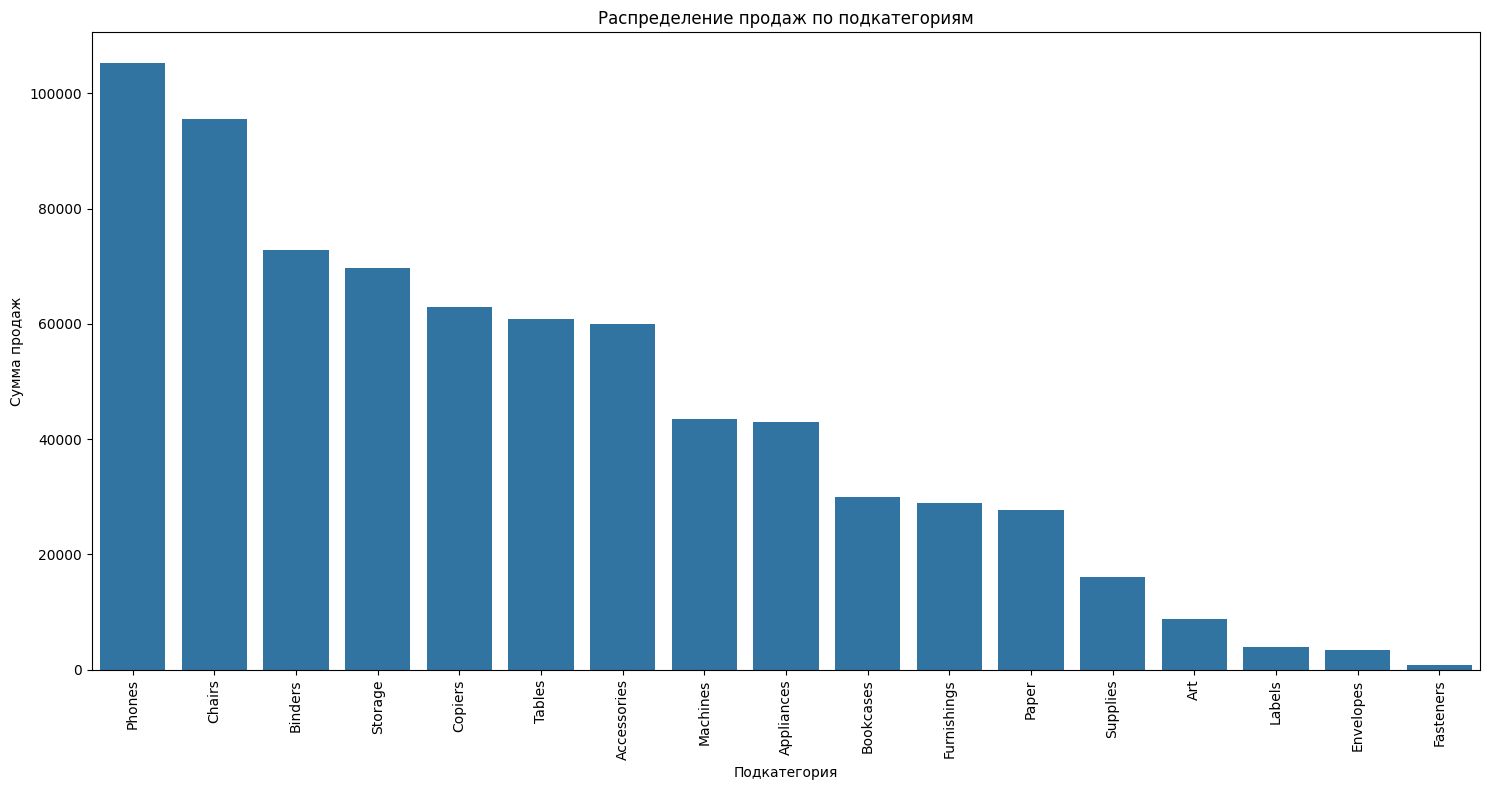

In [96]:
sales_by_subcategory = df.groupby('subCategory')['sales'].sum().reset_index()
sales_by_subcategory = sales_by_subcategory.sort_values(by='sales', ascending=False)

plt.figure(figsize=(15, 8))
sns.barplot(x='subCategory', y='sales', data=sales_by_subcategory)
plt.xticks(rotation=90)
plt.title('Распределение продаж по подкатегориям')
plt.xlabel('Подкатегория')
plt.ylabel('Сумма продаж')
plt.tight_layout()
plt.show()

 в подкатегориях лидер -Телефоны, аутсайдер - Крепеж

 распределение продаж по городам (штатам)

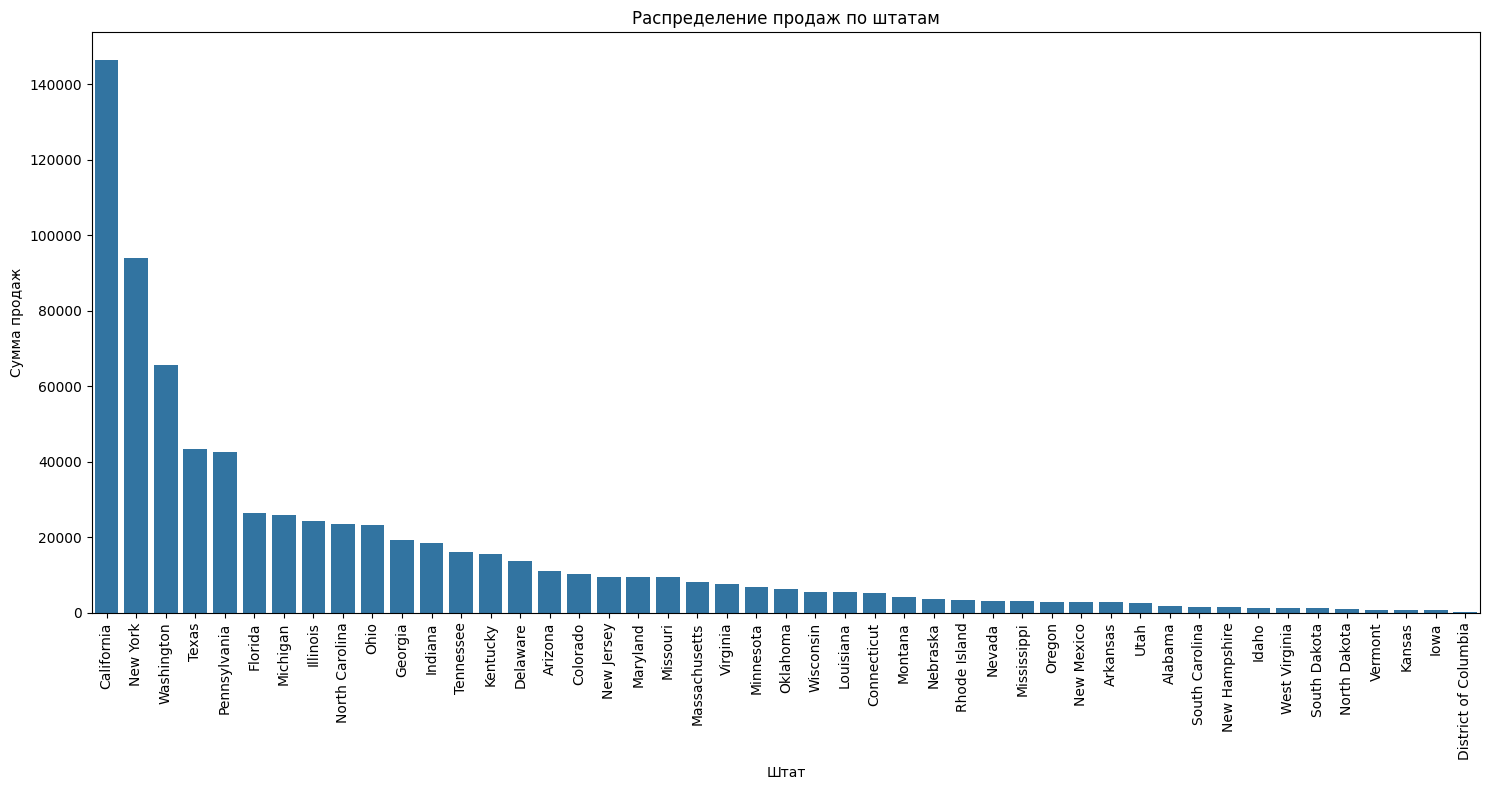

In [97]:
sales_by_state = df.groupby('state')['sales'].sum().reset_index()
sales_by_state = sales_by_state.sort_values(by='sales', ascending=False)

plt.figure(figsize=(15, 8))
sns.barplot(x='state', y='sales', data=sales_by_state)
plt.xticks(rotation=90)
plt.title('Распределение продаж по штатам')
plt.xlabel('Штат')
plt.ylabel('Сумма продаж')
plt.tight_layout()
plt.show()

 - распределение продаж по  штатам практически совпадает с распределением заказов по штатам (см. выше) лидируют Калифорния, Нью Йорк, Техас.

Распределение продаж по городам (топ 20)

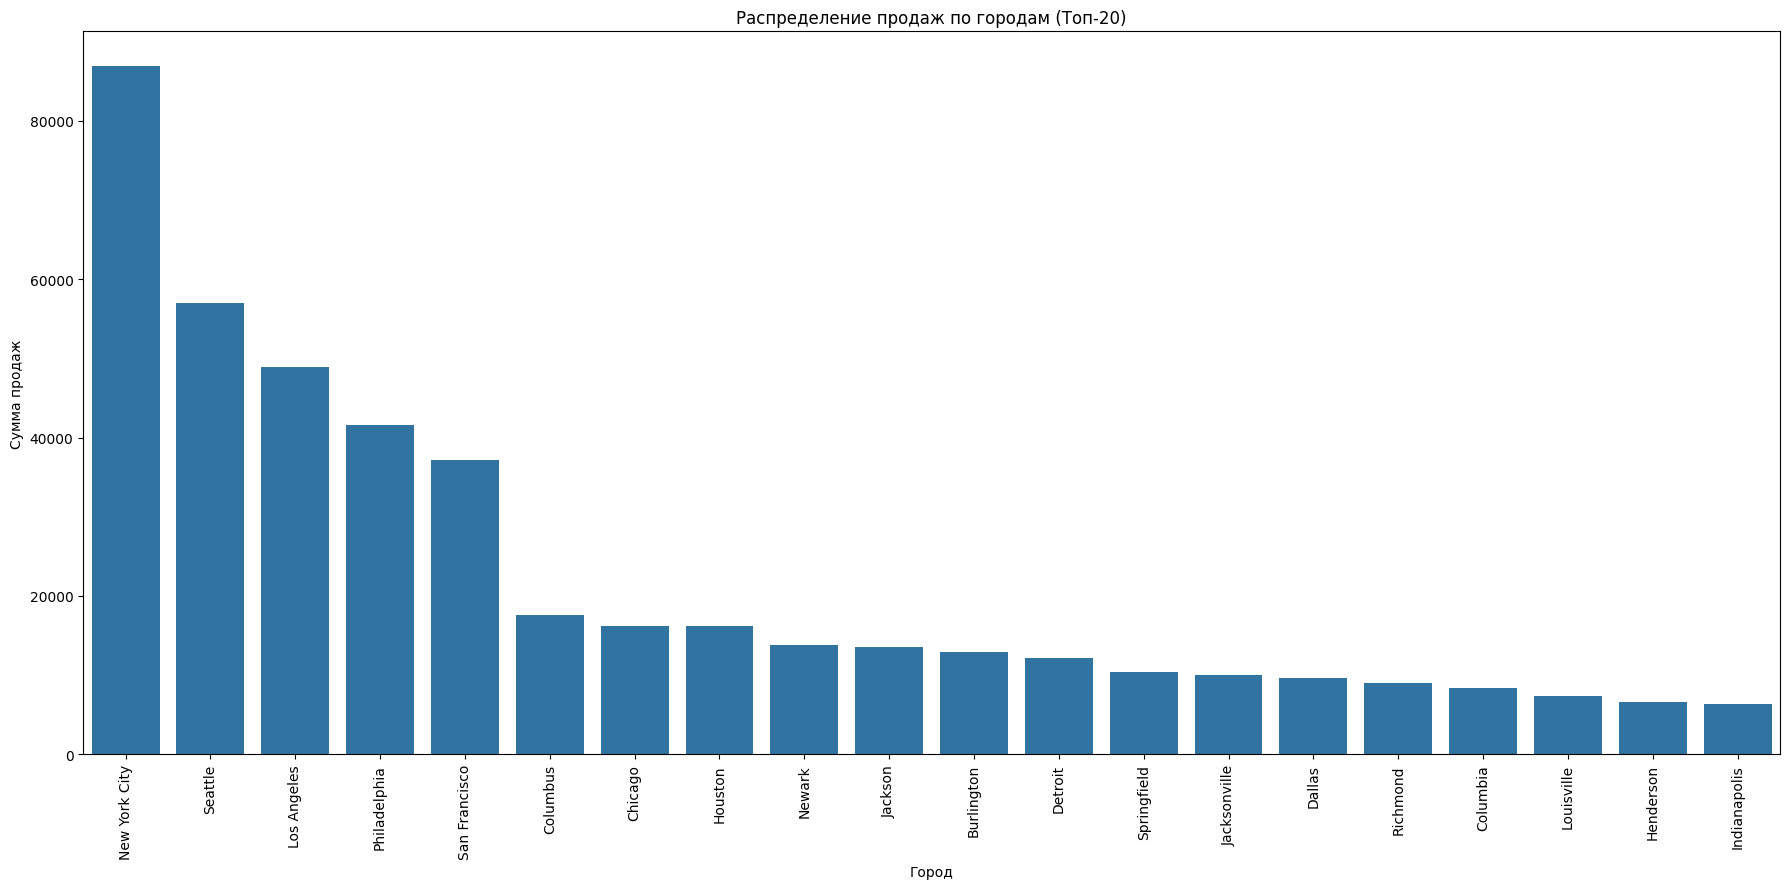

In [98]:
sales_by_city = df.groupby('city')['sales'].sum().reset_index()
sales_by_city = sales_by_city.sort_values(by='sales', ascending=False)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 9))
sns.barplot(x='city', y='sales', data=sales_by_city.head(20)) # Display top 20 cities for readability
plt.xticks(rotation=90)
plt.xticks(fontsize=10)
plt.title('Распределение продаж по городам (Топ-20)')
plt.xlabel('Город')
plt.ylabel('Сумма продаж')
plt.tight_layout()
plt.show()

 - в распределении по городам -  лидеры - Нью Йорк, Сиэтл, Лос Анжелес, расположены в лидирующих штатах (Калифорния, Нью Йорк, Техас)

найти самые популярные товары (Product Name)

In [99]:
popular_products = df.groupby('productName')['sales'].sum().reset_index()
popular_products = popular_products.sort_values(by='sales', ascending=False)

print("Топ-10 самых популярных товаров по объему продаж:")
display(popular_products.head(10))

Топ-10 самых популярных товаров по объему продаж:


,productName,sales
339,Canon imageCLASS 2200 Advanced Copier,35699.898
864,Martin Yale Chadless Opener Electric Letter Op...,11825.902
570,GBC DocuBind TL300 Electric Binding System,10943.278
671,Hewlett Packard LaserJet 3310 Copier,9239.846
1140,Samsung Galaxy Mega 6.3,9239.780
398,Cubify CubeX 3D Printer Triple Head Print,7999.980
539,Fellowes PB500 Electric Punch Plastic Comb Bin...,7371.742
655,HON 5400 Series Task Chairs for Big and Tall,7220.094
567,GBC DocuBind P400 Electric Binding System,7077.148
816,Lexmark MX611dhe Monochrome Laser Printer,5609.967


 - популярность товаров определялась по объему продаж, поэтому лидируют самые дорогие товары из подкатегории офисная техника

 распределение категорий внутри городов (штатам)

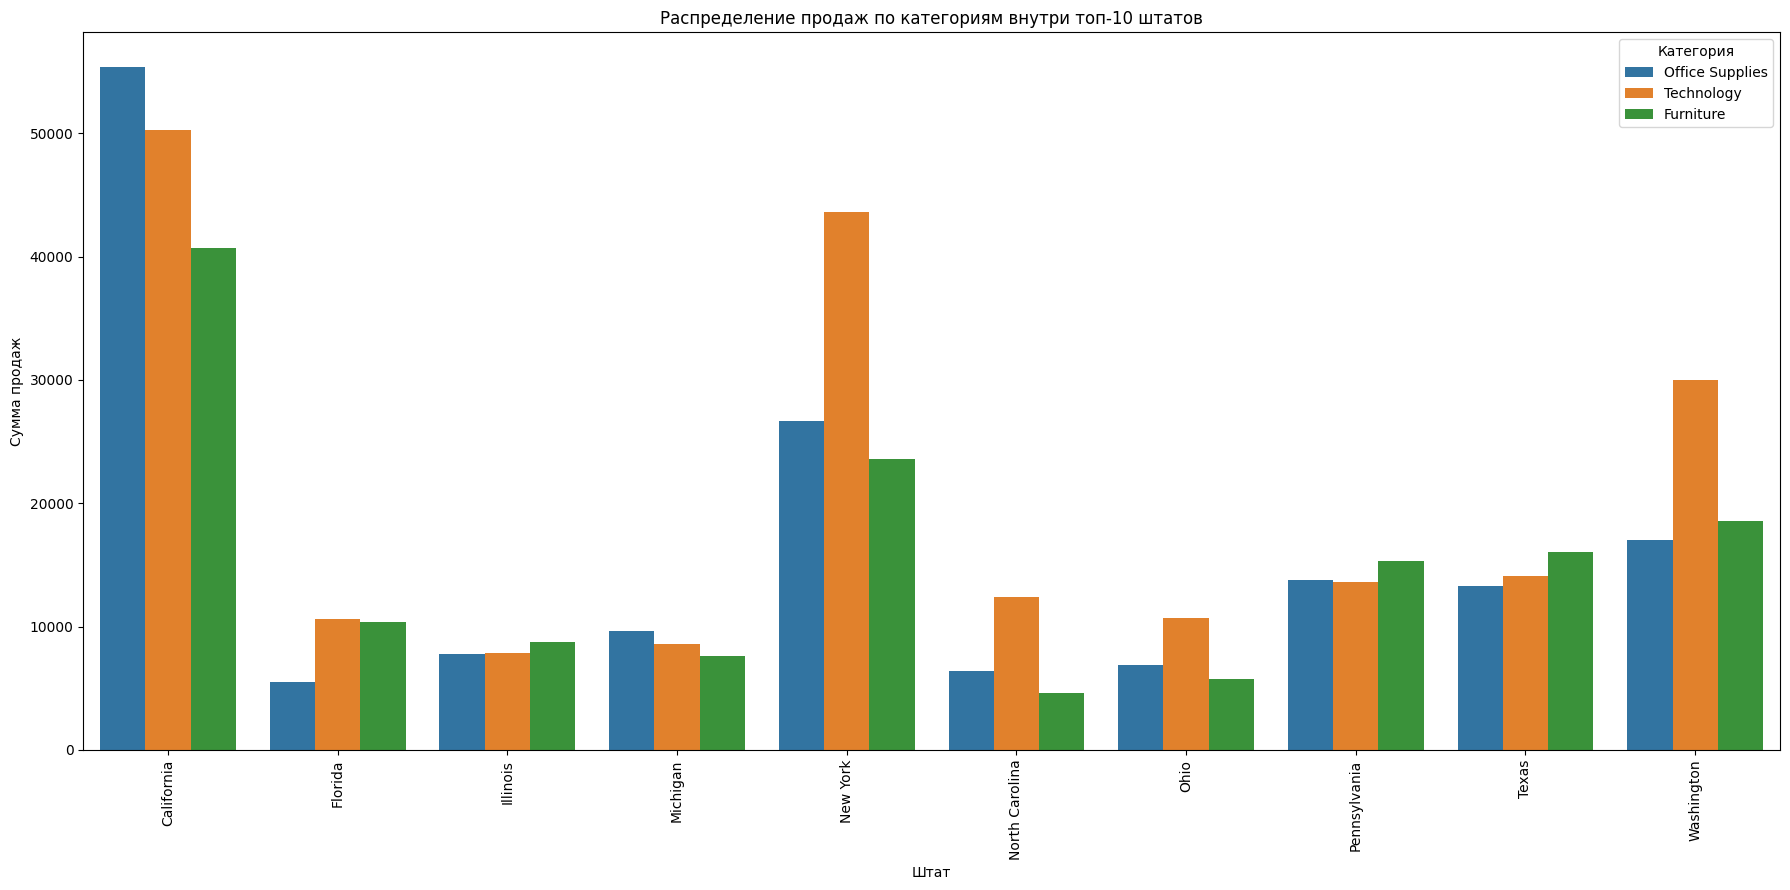

In [100]:
sales_by_state_category = df.groupby(['state', 'category'])['sales'].sum().reset_index()
sales_by_state_category = sales_by_state_category.sort_values(by=['state', 'sales'], ascending=[True, False])

# Get top N states by total sales to make the plot readable if there are too many states
top_states = df.groupby('state')['sales'].sum().nlargest(10).index
sales_by_state_category_filtered = sales_by_state_category[sales_by_state_category['state'].isin(top_states)]

plt.figure(figsize=(18, 9))
sns.barplot(x='state', y='sales', hue='category', data=sales_by_state_category_filtered)
plt.xticks(rotation=90)
plt.title('Распределение продаж по категориям внутри топ-10 штатов')
plt.xlabel('Штат')
plt.ylabel('Сумма продаж')
plt.legend(title='Категория')
plt.tight_layout()
plt.show()

-  анализ распределения категорий внутри штатов подтверждает лидерство штатов Калифорния, Нью Йорк, Вашингтон, причем в Калифорнии заказывают больше офисной техники, а жители штата  Нью Йорк и Вашингтон больше покупают товаров из категории "Технологии"

динамика продаж внутри категорий

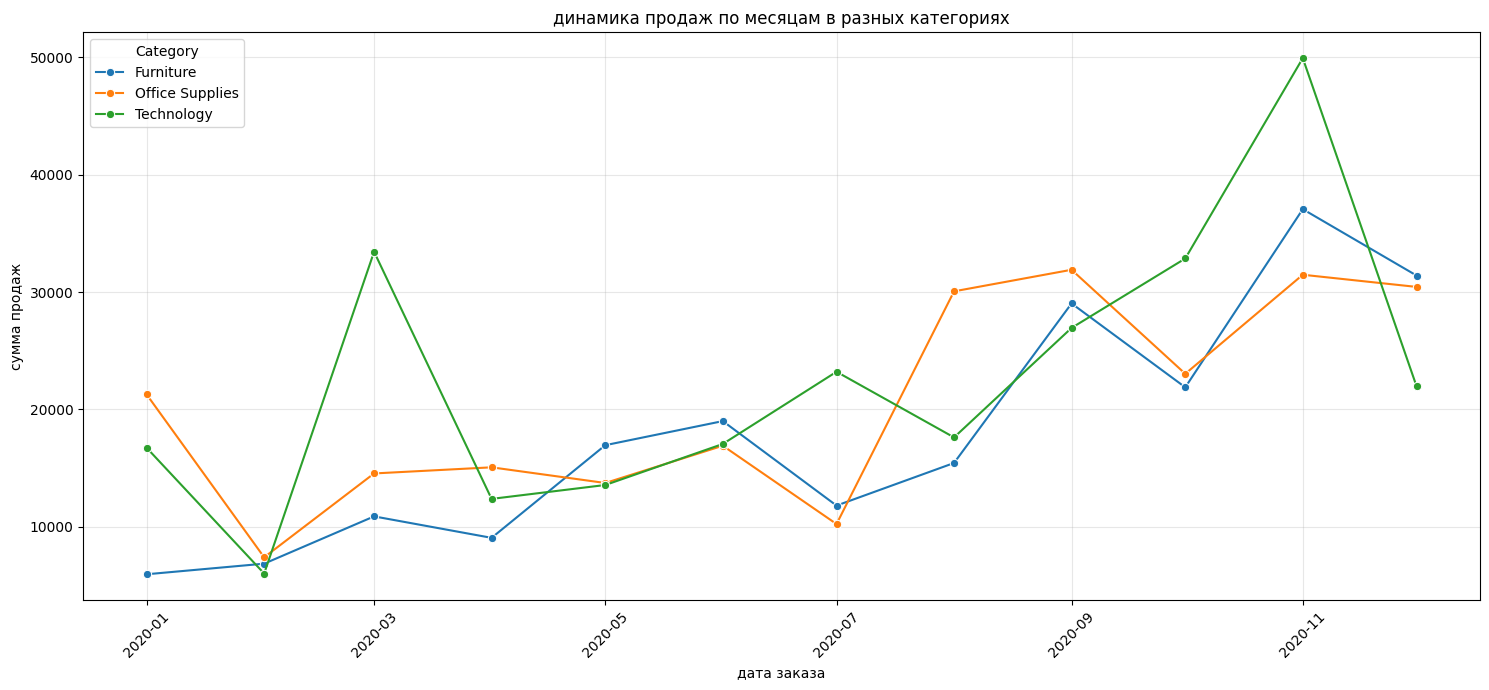

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate monthly sales by category
monthly_sales_by_category = df.copy()
monthly_sales_by_category['orderMonth'] = monthly_sales_by_category['orderDate'].dt.to_period('M')
monthly_sales_by_category = monthly_sales_by_category.groupby(['orderMonth', 'category'])['sales'].sum().reset_index()

# Ensure 'orderMonth' is datetime and 'sales' is numeric before plotting
monthly_sales_by_category_plot = monthly_sales_by_category.copy()
if monthly_sales_by_category_plot['orderMonth'].dtype == 'Period[M]':
    monthly_sales_by_category_plot['orderMonth'] = monthly_sales_by_category_plot['orderMonth'].dt.to_timestamp()
monthly_sales_by_category_plot['sales'] = pd.to_numeric(monthly_sales_by_category_plot['sales'], errors='coerce')

plt.figure(figsize=(15, 7))
sns.lineplot(x='orderMonth', y='sales', hue='category', data=monthly_sales_by_category_plot, marker='o')
plt.title('динамика продаж по месяцам в разных категориях')
plt.xlabel('дата заказа')
plt.ylabel('сумма продаж')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend(title='Category')
plt.tight_layout()
plt.show()

 - динамика продаж разных категорий показывает устойчивый рост продаж всех категорий, кроме того, продажи категории Технология имеют максимумы в марте и ноябре

Динамика продаж подкатегорий в категории Технологиия

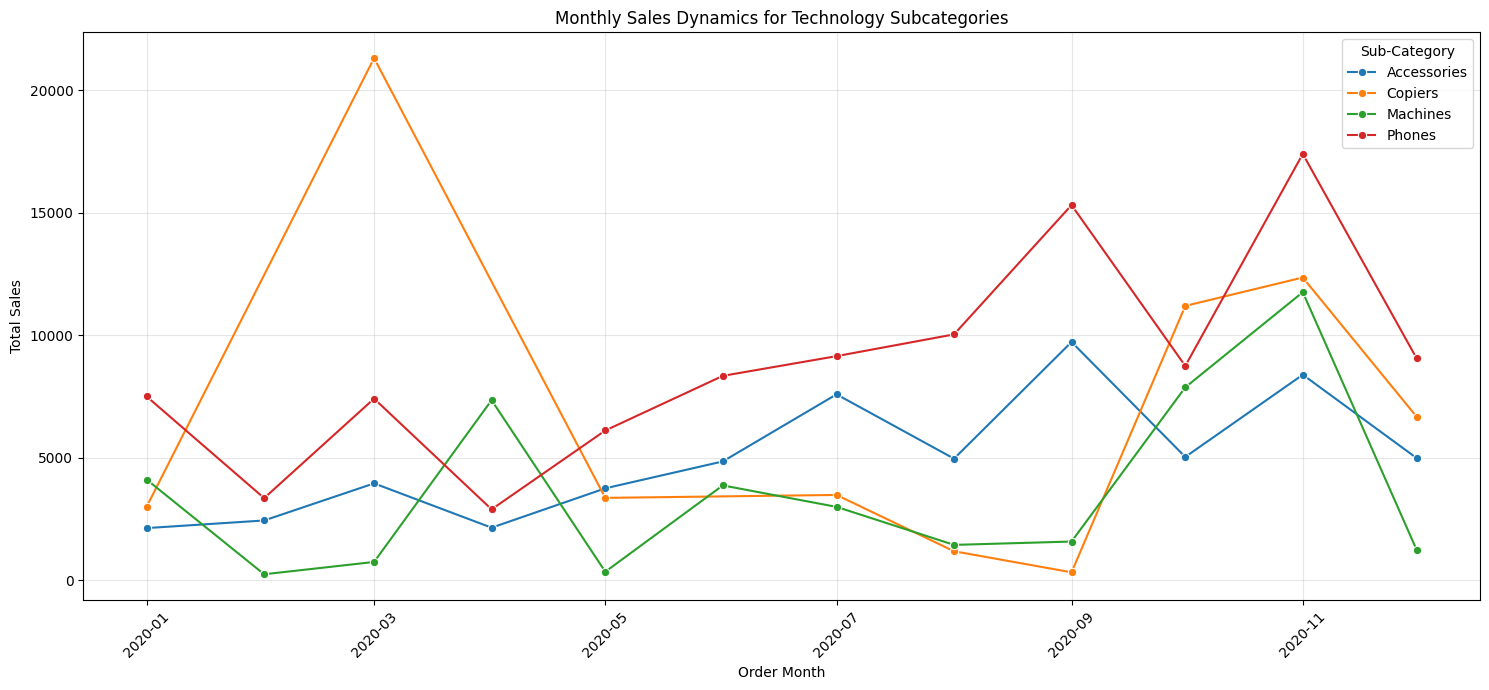

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for 'Technology' category
tech_sales_df = df[df['category'] == 'Technology'].copy()

# Calculate monthly sales by subCategory within 'Technology'
monthly_tech_subcategory_sales = tech_sales_df.copy()
monthly_tech_subcategory_sales['orderMonth'] = monthly_tech_subcategory_sales['orderDate'].dt.to_period('M')
monthly_tech_subcategory_sales = monthly_tech_subcategory_sales.groupby(['orderMonth', 'subCategory'])['sales'].sum().reset_index()
monthly_tech_subcategory_sales.columns = ['orderMonth', 'subCategory', 'total_sales']

# Ensure 'orderMonth' is datetime for plotting
monthly_tech_subcategory_sales_plot = monthly_tech_subcategory_sales.copy()
if monthly_tech_subcategory_sales_plot['orderMonth'].dtype == 'Period[M]':
    monthly_tech_subcategory_sales_plot['orderMonth'] = monthly_tech_subcategory_sales_plot['orderMonth'].dt.to_timestamp()

plt.figure(figsize=(15, 7))
sns.lineplot(x='orderMonth', y='total_sales', hue='subCategory', data=monthly_tech_subcategory_sales_plot, marker='o')
plt.title('Monthly Sales Dynamics for Technology Subcategories')
plt.xlabel('Order Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend(title='Sub-Category')
plt.tight_layout()
plt.show()

 - расссмотрение динамики продаж подкатегорий в категории Технология показывает, что максимумы продажи категории Технология в марте и ноябре обусловлены продажей дорогостоящих копиров. Вклад от продаж других подкатегорий примерно одинаков

# Выводы

 1. Исследование охватывает период 01 01 20 - 3 12 20 =год
 2. Количество уникальных заказов: 1687
 3. Количество уникальных клиентов: 693
 4. по колич. заказов лидируют Калифорния, Нью Йорк, Техас.
 5. колич. заказов по штатам коррелирует (совпадает, пропорцианально) с числом клиентов в штатах
 6. по суммам продаж лидируют Калифорния, Нью Йорк, Вашингтон.
 7. динамика количества заказов по месяцам (дате заказа.) показывает рост колич заказов в течение года от 60 (янв, февр) до 220 в конце года.
 8. аналогично ведет себя сума продаж: растет от 30000 в начале года до 90000 в конце.
 9. по продажам лидирует категория Технология, замыкает список - Фурнитура; в подкатегориях лидер -Телефоны, аутсайдер - Крепеж
 10. распределение продаж по  штатам практически совпадает с распределением заказов по штатам (см. выше) лидируют Калифорния, Нью Йорк, Техас.
 11. в распределении по городам -  лидеры - Нью Йорк, Сиэтл, Лос Анжелес, расположены в лидирующих штатах (Калифорния, Нью Йорк, Техас)
 12. популярность товаров определялась по объему продаж, поэтому лидируют самые дорогие товары из подкатегории офисная техника
 13. анализ распределения категорий внутри штатов подтверждает лидерство штатов Калифорния, Нью Йорк, Вашингтон, причем в Калифорнии заказывают больше офисной техники, а жители штата  Нью Йорк и Вашингтон больше покупают товаров из категории "Технологии"
 14. динамика продаж разных категорий показывает устойчивый рост продаж всех категорий, кроме того, продажи категории Технология имеют максимумы в марте и ноябре
 15. расссмотрение динамики продаж подкатегорий в категории Технология показывает, что максимумы продажи категории Технология в марте и ноябре обусловлены продажей дорогостоящих копиров. Вклад от продаж других подкатегорий примерно одинаков


#                            КОНЕЦ

In [103]:
# на основании исследовательского анализа данных выявить закономерности и описать в формате нумерованного списка